### Namaster - pymaster 

https://namaster.readthedocs.io/en/latest/pymaster.html

Many of the functions in Namaster accept or return sets of power spectra (arrays with one element per angular multipole) or bandpowers (binned versions of power spectra). In all cases, these are returned and provided as 2D arrays with shape [n_cls][nl], where n_cls is the number of power spectra and nl is either the number of multipoles or bandpowers. In all cases, n_cls should correspond with the spins of the two fields being correlated, and the ordering is as follows:

    Two spin-0 fields: n_cls=1, [C_T1T2]
    One spin-0 field and one spin-2 field: n_cls=2, [C_TE,C_TB]
    Two spin-2 fields: n_cls=4, [C_E1E2,C_E1B2,C_E2B1,C_B1B2]

All sky maps accepted and returned by these functions are in the form of HEALPix maps exclusively with RING ordering.

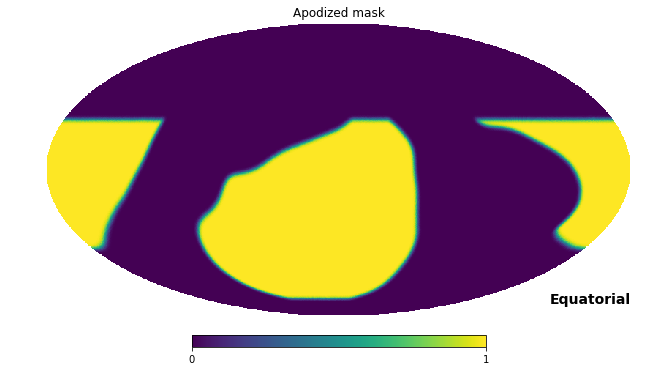

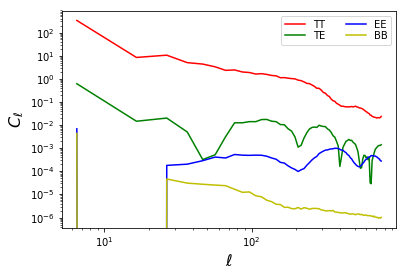

In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# Import the NaMaster python wrapper
import pymaster as nmt

#  Simple example showcasing the use of NaMaster to compute the pseudo-Cl
#  estimator of the angular cross-power spectrum of a spin-0 field and a
#  spin-2 field

# HEALPix resolution parameter used here
nside = 256

# Read mask and apodize it on a scale of ~1deg
mask = nmt.mask_apodization(hp.read_map("mask.fits", verbose=False),
                            1., apotype="Smooth")
hp.mollview(mask, coord=['G', 'C'], title='Apodized mask')
plt.show()

# Read healpix maps and initialize a spin-0 and spin-2 field
f_0 = nmt.NmtField(mask, [hp.read_map("maps.fits", field=0, verbose=False)])
f_2 = nmt.NmtField(mask, hp.read_map("maps.fits", field=[1, 2], verbose=False))

# Initialize binning scheme with 4 ells per bandpower
#b = nmt.NmtBin.from_nside_linear(nside, 4)

#nlb: how many ell's in each bin:
b= nmt.NmtBin(nside,nlb=10)

# Compute MASTER estimator
# spin-0 x spin-0
cl_00 = nmt.compute_full_master(f_0, f_0, b)
# spin-0 x spin-2
cl_02 = nmt.compute_full_master(f_0, f_2, b)
# spin-2 x spin-2
cl_22 = nmt.compute_full_master(f_2, f_2, b)




# Plot results
ell_arr = b.get_effective_ells()
plt.plot(ell_arr, cl_00[0], 'r-', label='TT')
plt.plot(ell_arr, np.fabs(cl_02[0]), 'g-', label='TE')
plt.plot(ell_arr, cl_22[0], 'b-', label='EE')
plt.plot(ell_arr, cl_22[3], 'y-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show();

